# Chapter 5. Support Vector Machines

SVM models are capable of performing linear and nonlinear classification, regression, and outlier detection.
They are especially well-suited for classification of complex small- or medium-sized data sets.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(0)

plt.style.use('seaborn-whitegrid')

In [3]:
%matplotlib inline

## Linear SVM classification

The SVM can be thought of as fitting the widest possible "street" between classes, thus separating the classes by staying as far away as possible from the training data.
This method is called *large margin classification*.
Further, adding more training instances outside of this margin does not affect the decision boundary.
Instead, it is fully determined by the instances on the ends of the margin; these are the *support vectors*.

### Soft margin classification

Strictly imposing that all instances must be outside of the margin is called *hard margin classification*.
This is only possible for linearly separable data and is sensitive to outliers (i.e. not robust).
Instead, a *soft margin classification* model finds a good balance between keeping the margin wide (good separation of classes) and limiting the margin "violations."
Of the SVM hyperparameters exposed by Scikit-Learn, `C` controls this balance; a lower value for `C` results in a "softer" margin (more violations are allowed).

The following is an example of using a linear SVM.

In [5]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()

# Petal length and width.
X = iris.data[:, (2, 3)]

# Labels for if the flower is Virginica
y = (iris.target == 2).astype(np.float64)

# Make a pipeline for the SVM classifier.
svm_clf = Pipeline([
    ('standard_scalar', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

# Train the model.
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('standard_scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

The following code finds the support vectors for the trained model.

In [72]:
svm_model = svm_clf.named_steps['linear_svc']
scaler = svm_clf.named_steps['standard_scalar']

# The offset of the data introduced by scaling.
b = svm_model.decision_function([-scaler.mean_ / scaler.scale_])
# The coefficients of the model with the scaling removed.
w = svm_model.coef_[0] / scaler.scale_

# An indicator variable:
#    1 for Virginica,
#   -1 for not Virginica
t = y * 2 - 1

# The support vecotrs are where the confidence is less than 1.
scores = t  * (X.dot(w) + b)
scores[49:53]

array([7.83571397, 1.00004662, 0.87138052, 0.50003496])

In [73]:
support_vectors_idx = (scores < 1).ravel()
support_vectors = X[support_vectors_idx]

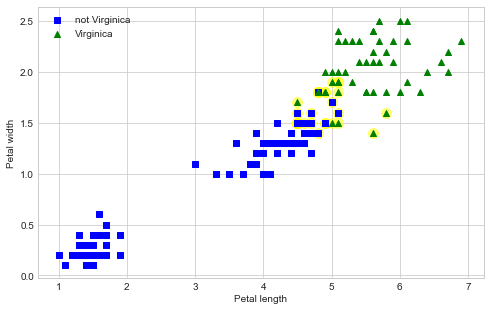

In [74]:
fig = plt.figure(figsize=(8, 5))

pal = [
    {'color':'blue', 'marker':'s', 'label': 'not Virginica'},
    {'color':'green', 'marker':'^', 'label': 'Virginica'}
]

plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
        color='yellow', marker='o', s=100, alpha=0.5)

for i in range(len(pal)):
    plt.scatter(X[:, 0][y == i], X[:, 1][y == i],
                color=pal[i]['color'], 
                marker=pal[i]['marker'], 
                label=pal[i]['label'])
    

    
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='best')
plt.show()

## Nonlinear SVM Classification